<a href="https://colab.research.google.com/github/AminaZahid/Roman-Urdu-Sentiment-Analysis-using-LSTM/blob/main/Roman_Urdu_Sentiment_Analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.constraints import max_norm
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
#from keras.preprocessing import Cleaned_X_Y

In [11]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
filename = "/content/drive/MyDrive/set_3classes_clean.csv"
df = pd.read_csv(filename,header='infer')
df = df[['text', 'label', 'char_len', 'word_count']]
df.head()

,text,label,char_len,word_count
0,are wha,Positive,6,2
1,wha khubiya,Positive,10,2
2,everyone allah swt hamesha lawzo zaat sub hey,Positive,38,8
3,rab kreem reham watneaziz frmaamin,Positive,30,5
4,jaago coom jaago nokar humarey tex tankha paki...,Positive,54,10


In [12]:
df.describe()

,char_len,word_count
count,12491.000000,12491.000000
mean,26.364102,4.419102
std,24.732905,3.707943
min,6.000000,2.000000
25%,13.000000,2.000000
50%,20.000000,3.000000
75%,32.000000,5.000000
max,978.000000,102.000000


In [13]:
df.columns

Index(['text', 'label', 'char_len', 'word_count'], dtype='object')

In [14]:
X_data = df['text'].values
y_data = df['label'].values

In [15]:
print("Data available and its shapes: X : {}, Y : {}".format(X_data.shape, y_data.shape))

Data available and its shapes: X : (12491,), Y : (12491,)


In [16]:
corp = []
for sentence in X_data:
    corp = corp + sentence.split()
print("Total No of Words : ", len(corp))
print("Size of the Vocabuary : ", len(set(corp)))

Total No of Words :  55199
Size of the Vocabuary :  28543


In [17]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 20
# This is fixed.
EMBEDDING_DIM = 10

In [18]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X_data)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 28543 unique tokens.


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
X = tokenizer.texts_to_sequences(X_data)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (12491, 20)


In [23]:
Y = pd.get_dummies(y_data).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (12491, 3)


In [24]:
# Train Test Split the data.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11241, 20) (11241, 3)
(1250, 20) (1250, 3)


In [25]:
model = Sequential()
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1])
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(20, dropout=0.4, recurrent_dropout=0.3, kernel_constraint=max_norm(3), recurrent_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 10)            100000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 20, 10)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 20)                2480      
                                                                 
 dense (Dense)               (None, 3)                 63        
                                                                 
Total params: 102,543
Trainable params: 102,543
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
embedding_layer.get_weights()

[]

In [27]:
epochs = 15
batch_size = 8
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/15
1265/1265 [==============================] - 39s 27ms/step - loss: 1.0942 - accuracy: 0.3714 - val_loss: 1.0877 - val_accuracy: 0.3938
Epoch 2/15
1265/1265 [==============================] - 33s 26ms/step - loss: 1.0768 - accuracy: 0.4115 - val_loss: 1.0699 - val_accuracy: 0.4284
Epoch 3/15
1265/1265 [==============================] - 28s 22ms/step - loss: 1.0314 - accuracy: 0.4670 - val_loss: 1.0242 - val_accuracy: 0.4791
Epoch 4/15
1265/1265 [==============================] - 29s 23ms/step - loss: 0.9412 - accuracy: 0.5460 - val_loss: 0.9766 - val_accuracy: 0.5484
Epoch 5/15
1265/1265 [==============================] - 28s 22ms/step - loss: 0.8751 - accuracy: 0.5858 - val_loss: 0.9511 - val_accuracy: 0.5627
Epoch 6/15
1265/1265 [==============================] - 28s 22ms/step - loss: 0.8213 - accuracy: 0.6216 - val_loss: 0.9418 - val_accuracy: 0.5884
Epoch 7/15
1265/1265 [==============================] - 26s 21ms/step - loss: 0.7667 - accuracy: 0.6592 - val_loss: 0.9293 -

In [28]:
# Evaluate the Model Accuracy on the Test data. 
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

40/40 [==============================] - 0s 4ms/step - loss: 0.9835 - accuracy: 0.5768
Test set
  Loss: 0.983
  Accuracy: 0.577


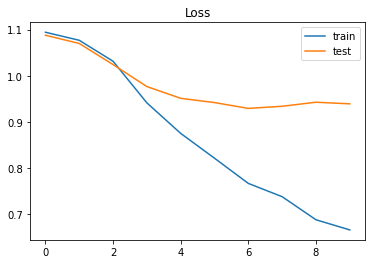

In [29]:
# Training vs Validation Loss Function
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

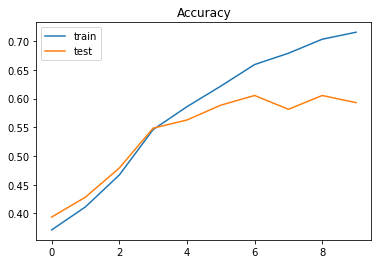

In [30]:
# Training vs Validation Accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [31]:
new_complaint = ['dil me khud aaka ho nala jm hai akbaal sjdo me pde rahna rahne se jnnat nahi milee yhi likha hai bahi']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Negative','Neutral','Positive']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 293ms/step
[[0.55089766 0.04368415 0.40541822]] Negative
